In [1]:
import pandas as pd

In [2]:
!pip3 install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [3]:
df = pd.read_csv('/Users/rusya/Documents/synthetic_data/pilot_results/ALL_ANS_12_DF_RIGHT_FORMAT/df_for_analysis_yandex_gpt_final.csv')

/var/folders/v_/zqcyjtwn0d70thqjm302x3zh0000gn/T/ipykernel_1883/4026977827.py:1: DtypeWarning: Columns (276,278,336,337,338,339,340) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/rusya/Documents/synthetic_data/pilot_results/ALL_ANS_12_DF_RIGHT_FORMAT/df_for_analysis_yandex_gpt_final.csv')


In [4]:
df_extra = pd.read_csv('/Users/rusya/Downloads/country_encoding - Лист1-2.csv')
df_extra

,code,country,year,ИЧР (годом ранее),ИЧР (того же года),ВВП на душу населения (2024),ICT Development Index 2024,"ICT Development Index 2024, Universal (personal indicators dominating)","ICT Development Index 2024, Meaningfull (infrastructure indicators dominating)","? Индекс цифровой экономики и общества (DESI, ЕС)","? Индекс цифровой экономики и общества (DESI, ЕС).1"
0,AND,Andorra,2018,0.873,0.875,46359.0,88.8,"87,6",90,NaN,NaN
1,ARG,Argentina,2017,0.857,0.861,13415.0,83.4,"79,5","87,3",NaN,NaN
2,ARM,Armenia,2021,0.761,0.786,8613.0,86.4,"81,2","91,6",NaN,NaN
3,BGD,Bangladash,2018,0.633,0.646,2622.0,62.0,"39,4","84,5",NaN,NaN
4,BOL,Bolivia,2017,0.714,0.715,3939.0,69.4,"62,4","76,5",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
60,USA,United States,2017,0.929,0.931,85812.0,96.7,99,"94,4",NaN,NaN
61,UZB,Uzbekistan,2022,0.727,0.737,3113.0,84.9,"86,5","83,3",NaN,NaN
62,VEN,Venezuela,2021,0.699,0.696,4511.0,63.4,"63,4",72,NaN,NaN
63,VNM,Vietnam,2020,0.744,0.755,4324.0,85.0,"79,1","90,8",NaN,NaN


In [5]:
df_gdp = df_extra[['code', 'year', 'ВВП на душу населения (2024)', 'ICT Development Index 2024', 'ICT Development Index 2024, Universal (personal indicators dominating)', 'ICT Development Index 2024, Meaningfull (infrastructure indicators dominating)']].copy()
df_gdp = df_gdp.rename(columns={
    'code': 'country',
    'year': 'A_YEAR',
    'ВВП на душу населения (2024)': 'GDP_per_capita_2024',
    'ICT Development Index 2024': 'ICT Development Index 2024',
    'ICT Development Index 2024, Universal (personal indicators dominating)': 'ICT Development Index 2024, Universal (personal indicators dominating)',
    'ICT Development Index 2024, Meaningfull (infrastructure indicators dominating)': 'ICT Development Index 2024, Meaningfull (infrastructure indicators dominating)'
})

df = df.merge(
    df_gdp,
    how='left',
    on=['country', 'A_YEAR']
)

df

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,index,Unnamed: 0.1,Unnamed: 0,version,doi,A_WAVE,A_YEAR,...,Q190_gpt,Q191_gpt,Q192_gpt,Q193_gpt,Q194_gpt,Q195_gpt,GDP_per_capita_2024,ICT Development Index 2024,"ICT Development Index 2024, Universal (personal indicators dominating)","ICT Development Index 2024, Meaningfull (infrastructure indicators dominating)"
0,0,0,0,0,0,0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,...,2.0,1.0,1.0,5.0,2.0,4.0,46359.0,88.8,"87,6",90
1,1,1,1,1,1,1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,...,1.0,1.0,1.0,6.0,2.0,4.0,46359.0,88.8,"87,6",90
2,2,2,2,2,2,2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,...,1.0,1.0,1.0,6.0,1.0,5.0,46359.0,88.8,"87,6",90
3,3,3,3,3,3,3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,...,3.0,2.0,1.0,6.0,2.0,4.0,46359.0,88.8,"87,6",90
4,4,4,4,4,4,4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,...,2.0,1.0,1.0,6.0,2.0,5.0,46359.0,88.8,"87,6",90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95402,95402,95402,95402,97215,97215,97215,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,...,3.0,2.0,1.0,4.0,2.0,5.0,2073.0,47.7,"44,9","50,6"
95403,95403,95403,95403,97216,97216,97216,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,...,3.0,2.0,1.0,5.0,2.0,7.0,2073.0,47.7,"44,9","50,6"
95404,95404,95404,95404,97217,97217,97217,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,...,2.0,1.0,1.0,3.0,2.0,4.0,2073.0,47.7,"44,9","50,6"
95405,95405,95405,95405,97218,97218,97218,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,...,2.0,1.0,1.0,3.0,2.0,4.0,2073.0,47.7,"44,9","50,6"


In [6]:
Q182_equal = (df['Q182'] == df['Q182_gpt'])

In [7]:
df['Q182_equal'] = Q182_equal

In [8]:
fsi = pd.read_csv('/Users/rusya/Downloads/FSI_language_difficulty_eng - Лист1.csv')
fsi

,code,language,closely related,similar to eng,ling and/or cult differ,cignificant ling and/or cult differ,exceptionally difficult
0,30,30 Afar,0,0,1,0,0
1,40,40 Afrikaans,1,0,0,0,0
2,100,100 Albanian,0,0,0,1,0
3,140,140 Amharic,0,0,0,1,0
4,170,170 Arabic,0,0,0,0,1
...,...,...,...,...,...,...,...
159,4620,4620 Yoruba,0,0,1,0,0
160,9000,9000 Other,0,0,0,0,0
161,9040,9040 Other European,0,1,0,0,0
162,9060,9060 Other Chinese dialects,0,0,0,0,1


In [9]:
fsi['fsi'] = fsi[['closely related', 'similar to eng', 'ling and/or cult differ', 'cignificant ling and/or cult differ', 'exceptionally difficult']].values.argmax(axis=1) + 1

In [10]:
fsi.rename(columns={'code': 'Q272'}, inplace=True)
fsi

,Q272,language,closely related,similar to eng,ling and/or cult differ,cignificant ling and/or cult differ,exceptionally difficult,fsi
0,30,30 Afar,0,0,1,0,0,3
1,40,40 Afrikaans,1,0,0,0,0,1
2,100,100 Albanian,0,0,0,1,0,4
3,140,140 Amharic,0,0,0,1,0,4
4,170,170 Arabic,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...
159,4620,4620 Yoruba,0,0,1,0,0,3
160,9000,9000 Other,0,0,0,0,0,1
161,9040,9040 Other European,0,1,0,0,0,2
162,9060,9060 Other Chinese dialects,0,0,0,0,1,5


In [11]:
df1 = df.merge(fsi, on='Q272', how='left')
df1

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,index,Unnamed: 0.1,Unnamed: 0,version,doi,A_WAVE,A_YEAR,...,"ICT Development Index 2024, Universal (personal indicators dominating)","ICT Development Index 2024, Meaningfull (infrastructure indicators dominating)",Q182_equal,language,closely related,similar to eng,ling and/or cult differ,cignificant ling and/or cult differ,exceptionally difficult,fsi
0,0,0,0,0,0,0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,...,"87,6",90,False,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,1,1,1,1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,...,"87,6",90,False,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,0.0,1.0
2,2,2,2,2,2,2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,...,"87,6",90,False,810 Catalan; Valencian,1.0,0.0,0.0,0.0,0.0,1.0
3,3,3,3,3,3,3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,...,"87,6",90,False,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,0.0,1.0
4,4,4,4,4,4,4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,...,"87,6",90,False,1270 Spanish; Castilian,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95402,95402,95402,95402,97215,97215,97215,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,...,"44,9","50,6",False,3830 Shona;chiShona,0.0,0.0,1.0,0.0,0.0,3.0
95403,95403,95403,95403,97216,97216,97216,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,...,"44,9","50,6",False,3200 North Ndebele,0.0,0.0,1.0,0.0,0.0,3.0
95404,95404,95404,95404,97217,97217,97217,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,...,"44,9","50,6",False,3830 Shona;chiShona,0.0,0.0,1.0,0.0,0.0,3.0
95405,95405,95405,95405,97218,97218,97218,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,...,"44,9","50,6",False,3830 Shona;chiShona,0.0,0.0,1.0,0.0,0.0,3.0


In [12]:
!pip3 install statsmodels


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [12]:
import numpy as np
import pandas as pd
import statsmodels as sm
from statsmodels.base.model import GenericLikelihoodModel

In [13]:
from statsmodels import discrete
from statsmodels.discrete import discrete_model

In [14]:
df1['Q182_equal'] = df1['Q182_equal'].astype(int)
df1 = df1.dropna(subset=['Q182_equal', 'fsi'])

In [15]:
df1.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'index', 'Unnamed: 0.1',
       'Unnamed: 0', 'version', 'doi', 'A_WAVE', 'A_YEAR',
       ...
       'ICT Development Index 2024, Universal (personal indicators dominating)',
       'ICT Development Index 2024, Meaningfull (infrastructure indicators dominating)',
       'Q182_equal', 'language', 'closely related', 'similar to eng',
       'ling and/or cult differ', 'cignificant ling and/or cult differ',
       'exceptionally difficult', 'fsi'],
      dtype='object', length=372)

In [19]:
lcl = df1[['Q182_equal', 'fsi', 'GDP_per_capita_2024', 'ICT_Dev_Index_2024']]
lcl.corr()

,Q182_equal,fsi,GDP_per_capita_2024,ICT_Dev_Index_2024
Q182_equal,1.000000,0.041523,-0.024715,-0.070151
fsi,0.041523,1.000000,-0.278034,0.077053
GDP_per_capita_2024,-0.024715,-0.278034,1.000000,0.590540
ICT_Dev_Index_2024,-0.070151,0.077053,0.590540,1.000000


In [17]:
# Переименуем колонку в удобный формат
df1 = df1.rename(columns={'ICT Development Index 2024': 'ICT_Dev_Index_2024'})

In [20]:
import statsmodels.api as sm

# Формула для модели
formula = (
    'Q182_equal ~ C(fsi) + ' # + '
    'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df1)
results = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.331468
         Iterations: 50
         Function evaluations: 57
         Gradient evaluations: 57
                           Logit Regression Results                           
Dep. Variable:             Q182_equal   No. Observations:                85761
Model:                          Logit   Df Residuals:                    85755
Method:                           MLE   Df Model:                            5
Date:                Sun, 08 Jun 2025   Pseudo R-squ.:                 0.01271
Time:                        12:40:51   Log-Likelihood:                -28427.
converged:                       True   LL-Null:                       -28793.
Covariance Type:            nonrobust   LLR p-value:                6.467e-156
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             

## посмотрим, как различаются распределения для стран с языкакми 'closely related'

In [60]:
!pip3 install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [62]:
df1[df1['closely related'] == 1]['language'].unique()

array(['1270 Spanish; Castilian', '810 Catalan; Valencian',
       '3530 Portuguese', '1400 French', '1240 English', '1990 Italian',
       '1190 Dutch', '3580 Romanian, Moldavian, Moldovan', '3600 Romansh',
       '3510 Nigerian Pidgin', '850 Chavacano; Chabacano'], dtype=object)

In [67]:
df1[df1['similar to eng'] == 1]['language'].unique()

array(['9040 Other European', '1530 German', '520 Betawi'], dtype=object)

In [53]:
df = pd.read_csv('/Users/rusya/Documents/synthetic_data/pilot_results/ALL_ANS_12_DF_RIGHT_FORMAT/df_for_analysis_yandex_gpt_final.csv')

/var/folders/v_/zqcyjtwn0d70thqjm302x3zh0000gn/T/ipykernel_92532/4026977827.py:1: DtypeWarning: Columns (276,278,336,337,338,339,340) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/rusya/Documents/synthetic_data/pilot_results/ALL_ANS_12_DF_RIGHT_FORMAT/df_for_analysis_yandex_gpt_final.csv')


In [63]:
def plot_question_by_country(df, question, country):
    sns.set_style("whitegrid")
    
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 12
    
    real_color = 'slategrey'
    yandex_color = 'gold'
    gpt_color = 'lightblue'
    
    country_df = df[df['country'] == country]
    
    if len(country_df) == 0:
        print(f"Нет данных для страны {country}")
        return
    
    # Проверка наличия столбцов в датафрейме
    real_col = question
    yandex_col = f"{question}_yandex"
    gpt_col = f"{question}_gpt"
    
    available_cols = []
    for col in [real_col, yandex_col, gpt_col]:
        if col in country_df.columns:
            available_cols.append(col)
        else:
            print(f"Предупреждение: столбец {col} отсутствует в датафрейме")
    
    if not available_cols:
        print("Нет доступных данных для построения графиков")
        return
    
    def clean_data(series):
        cleaned = series.dropna().astype(str).str.split('.').str[0]
        return pd.to_numeric(cleaned, errors='coerce').dropna().astype(int)
    
    data = {}
    for col in available_cols:
        values = clean_data(country_df[col])
        values = values[(values >= 0) & (values <= 10)]
        counts = np.bincount(values, minlength=11)[:11]
        data[col] = {
            'values': values,
            'counts': counts,
            'n': len(values)
        }
    
    # Определение максимального значения для масштабирования оси Y
    max_freq = max([d['counts'].max() for d in data.values()]) if data else 0
    y_max = max_freq * 1.1 if max_freq > 0 else 10
    
    # Создание фигуры с тремя subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle(f'Распределение ответов на вопрос {question}\nCтрана: {country}', 
                y=1.05, fontsize=16, fontweight='bold')
    
    sources = [
        (real_col, 'WWS', real_color),
        (gpt_col, 'ChatGPT', gpt_color),
        (yandex_col, 'YandexGPT', yandex_color)
    ]
    
    x_values = np.arange(0, 11)
    
    for i, (col, name, color) in enumerate(sources):
        ax = axes[i]
        
        if col in data:
            counts = data[col]['counts']
            n = data[col]['n']
            
            bars = ax.bar(x_values, counts, color=color, alpha=0.8, width=0.8)
            ax.set_title(f'{name}: {col}\n(n = {n})', pad=10, fontsize=14)
            ax.set_xlabel('Значения', fontsize=12)
            if i == 0:
                ax.set_ylabel('Количество ответов', fontsize=12)
            ax.set_xticks(x_values)
            ax.grid(axis='y', linestyle=':', alpha=0.7)
            ax.set_xlim(-0.5, 10.5)
            ax.set_ylim(0, y_max)
            
            # Добавление значений на столбцы
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}',
                           ha='center', va='bottom', fontsize=10)
        else:
            ax.set_title(f'{name}: данные отсутствуют')
            ax.set_xticks(x_values)
            ax.set_xlim(-0.5, 10.5)
            ax.set_ylim(0, y_max)
    
    plt.tight_layout()
    plt.show()

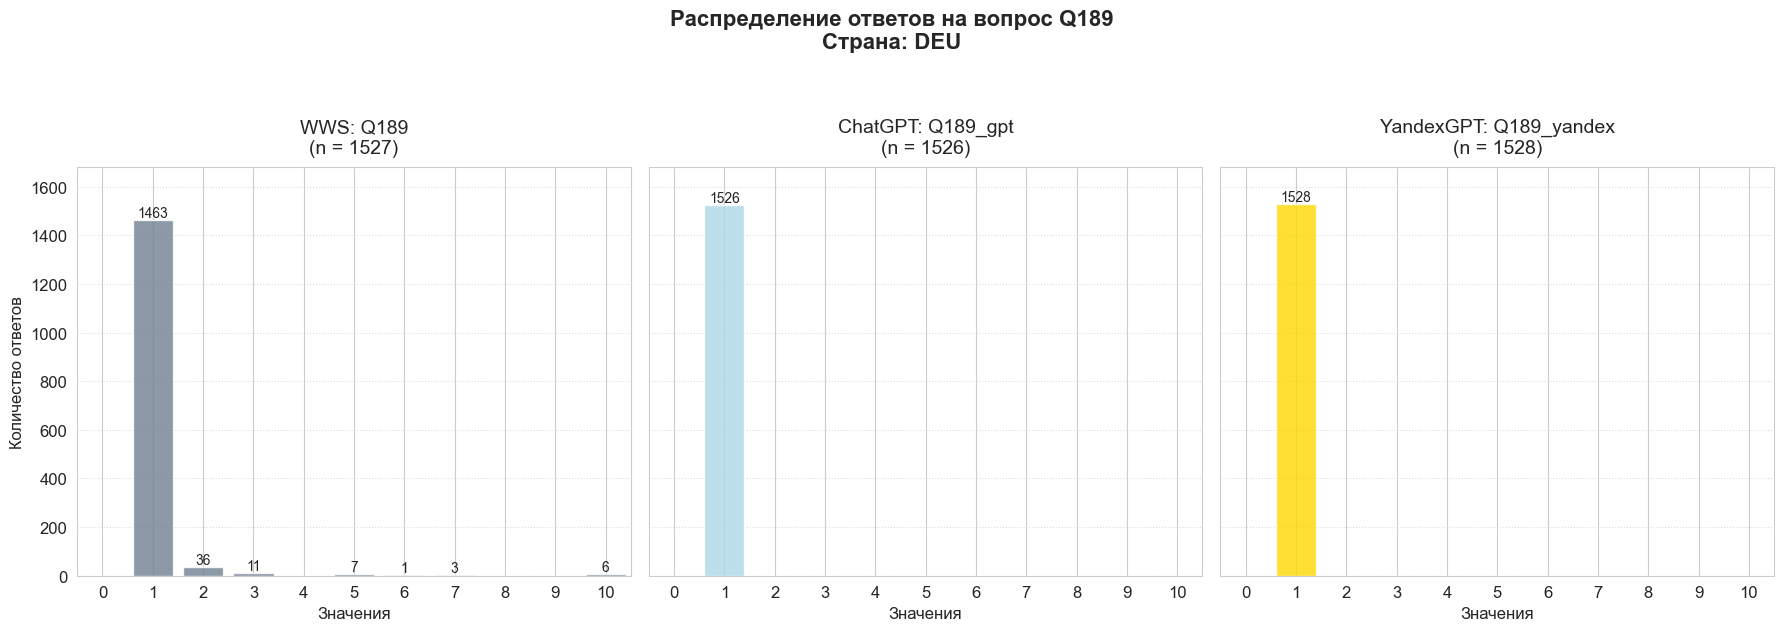

In [68]:
plot_question_by_country(df, 'Q189', 'DEU')

## let's plot the same logit-reg for Q183

In [23]:
df1 = df1.copy()
df1 = df1.dropna(subset = ['Q183', 'Q183_gpt'])
df1['Q183_equal'] = (df1['Q183'] == df1['Q183_gpt']).astype(int)

formula = (
    'Q183_equal ~ C(fsi) + '
    'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df1)
results = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.407369
         Iterations: 47
         Function evaluations: 52
         Gradient evaluations: 52
                           Logit Regression Results                           
Dep. Variable:             Q183_equal   No. Observations:                85753
Model:                          Logit   Df Residuals:                    85747
Method:                           MLE   Df Model:                            5
Date:                Sun, 08 Jun 2025   Pseudo R-squ.:                 0.03090
Time:                        13:15:59   Log-Likelihood:                -34933.
converged:                       True   LL-Null:                       -36047.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             

In [24]:
df1 = df1.copy()
df1 = df1.dropna(subset = ['Q183', 'Q183_gpt'])
df1['Q183_equal'] = (df1['Q183'] == df1['Q183_gpt']).astype(int)

formula = (
    'Q183_equal ~ C(fsi)' # + '
    # 'ICT_Dev_Index_2024' # + '
)

# Обучение модели
model = sm.formula.logit(formula, data=df1)
results = model.fit(method='bfgs', maxiter=1000)

# Результаты
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.405868
         Iterations: 39
         Function evaluations: 40
         Gradient evaluations: 40
                           Logit Regression Results                           
Dep. Variable:             Q183_equal   No. Observations:                92634
Model:                          Logit   Df Residuals:                    92629
Method:                           MLE   Df Model:                            4
Date:                Sun, 08 Jun 2025   Pseudo R-squ.:                 0.02261
Time:                        13:16:04   Log-Likelihood:                -37597.
converged:                       True   LL-Null:                       -38467.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.2051      0.

In [74]:
df1[df1['ling and/or cult differ'] == 1]['language'].unique()

array(['460 Batak', '1890 Indonesian', '2030 Javanese', '410 Banjar',
       '3420 Palembang', '4040 Sundanese', '2740 Madurese',
       '350 Balinese', '2790 Makassarese', '4310 Toraja-Saʼdan',
       '2920 Maori', '2810 Malay; Malaysian',
       '3840 Sidamo; Sidaama; Sidaamu Afoo', '30 Afar', '2657 Luhya',
       '2103 Kalenjin', '4075 Swahili', '2126 Kamba',
       '2720 Luo, Lwo; Lwoian', '2280 Kikuyu; Gikuyu', '2316 Kisii',
       '2981 Meru', '2987 Mijikenda', '2969 Maasai', '4365 Turkana',
       '1105 Maldivian', '4620 Yoruba', '1850 Igbo', '1980 Isoko',
       '4430 Urhobo', '4280 Tiv', '1260 Esan', '3830 Shona;chiShona',
       '3200 North Ndebele', '4295 Tonga', '890 Karanga; Korekore',
       '910 Ndau; chiNdau', '4460 ven Venda;Tshivenda', '2100 Kalanga',
       '950 Chitoko'], dtype=object)

In [101]:
df1[df1['cignificant ling and/or cult differ'] == 1]['language'].unique()

array(['200 Armenian; Hayeren', '3630 Russian', '3540 Punjabi, Panjabi',
       '4130 Tagalog', '1580 Greek, Modern', '4370 Turkish', '1040 Czech',
       '3610 Romani; Romany', '4410 Ukrainian', '3520 Polish',
       '100 Albanian', '720 Bulgarian', '2480 Lampung',
       '710 Buginese/Bugis', '1740 Hindi', '490 Bengali; Bangla',
       '2940 Marathi', '4220 Telugu', '310 Azerbaijani; Azeri',
       '3490 Persian; Farsi; Dari', '1540 Gilaki', '2420 Kurdish; Yezidi',
       '2670 Lurish; Luri; Bakhtiari', '4380 Turkmen',
       '230 Assyrian Neo-Aramaic', '2230 Kazakh', '4160 Tajik',
       '4200 Tatar', '4450 Uzbek', '2560 Lezgian; Lezgi; Lezgin',
       '4400 Uighur, Uyghur', '2310 Kirghiz; Kyrgyz', '3030 Mongolian',
       '4420 Urdu', '3550 Pashto, Pushto', '3720 Saraiki', '370 Balochi',
       '3860 Sindhi', '680 Brahui', '2210 Kashmiri', '1770 Hungarian',
       '250 Avar; Avaric', '860 Chechen', '4190 Tamil', '3780 Serbian',
       '3890 Slovak', '1930 Pamiri languages', '4470 V

In [102]:
df1[df1['exceptionally difficult'] == 1]['language'].unique()

array(['2020 Japanese', '790 Cantonese', '170 Arabic',
       '2870 Standard Chinese; Mandarin; Putonghua; Guoyu',
       '9060 Other Chinese dialects',
       '9900 Other local; aboriginal; tribal, community', '2390 Korean',
       '4150 Hokkien; Minnan', '1670 Hakka Chinese',
       '1695 Hassaniyya, Klem El Bithan', '4360 Tunisian Arabic;Tunisian'],
      dtype=object)

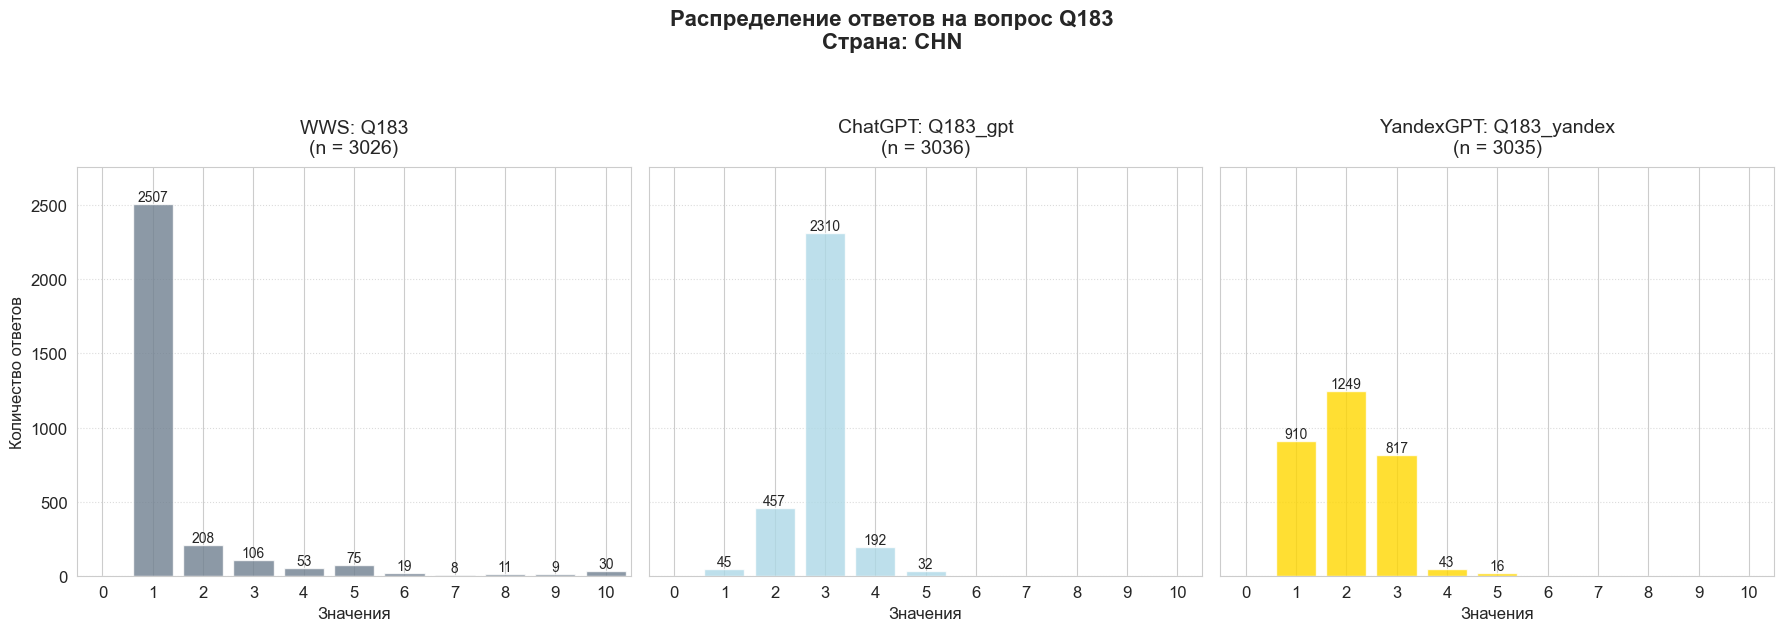

In [107]:
plot_question_by_country(df, 'Q183', 'CHN')

## Plot accuracy

In [18]:
import matplotlib.pyplot as plt

In [19]:
def plot_accuracy(name, df1):
    name_gpt = f'Q{name}_gpt'
    name_y = f'Q{name}_y'

    df1 = df1.copy()
    df1[name_y] = (df1[f'Q{name}'] == df1[name_gpt])

    share_ones = df1.groupby('fsi')[name_y].mean()

    plt.figure(figsize=(8, 5))
    share_ones.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('FSI Category')
    plt.ylabel('Share of Ones in y')
    plt.title('Share of Ones in y by FSI Category')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)
    plt.ylim(0, 1.0)  # ← this line sets y-axis limits
    plt.tight_layout()
    plt.show()


In [20]:
arr = [str(i) for i in list(range(158, 163)) + list(range(177, 196))]

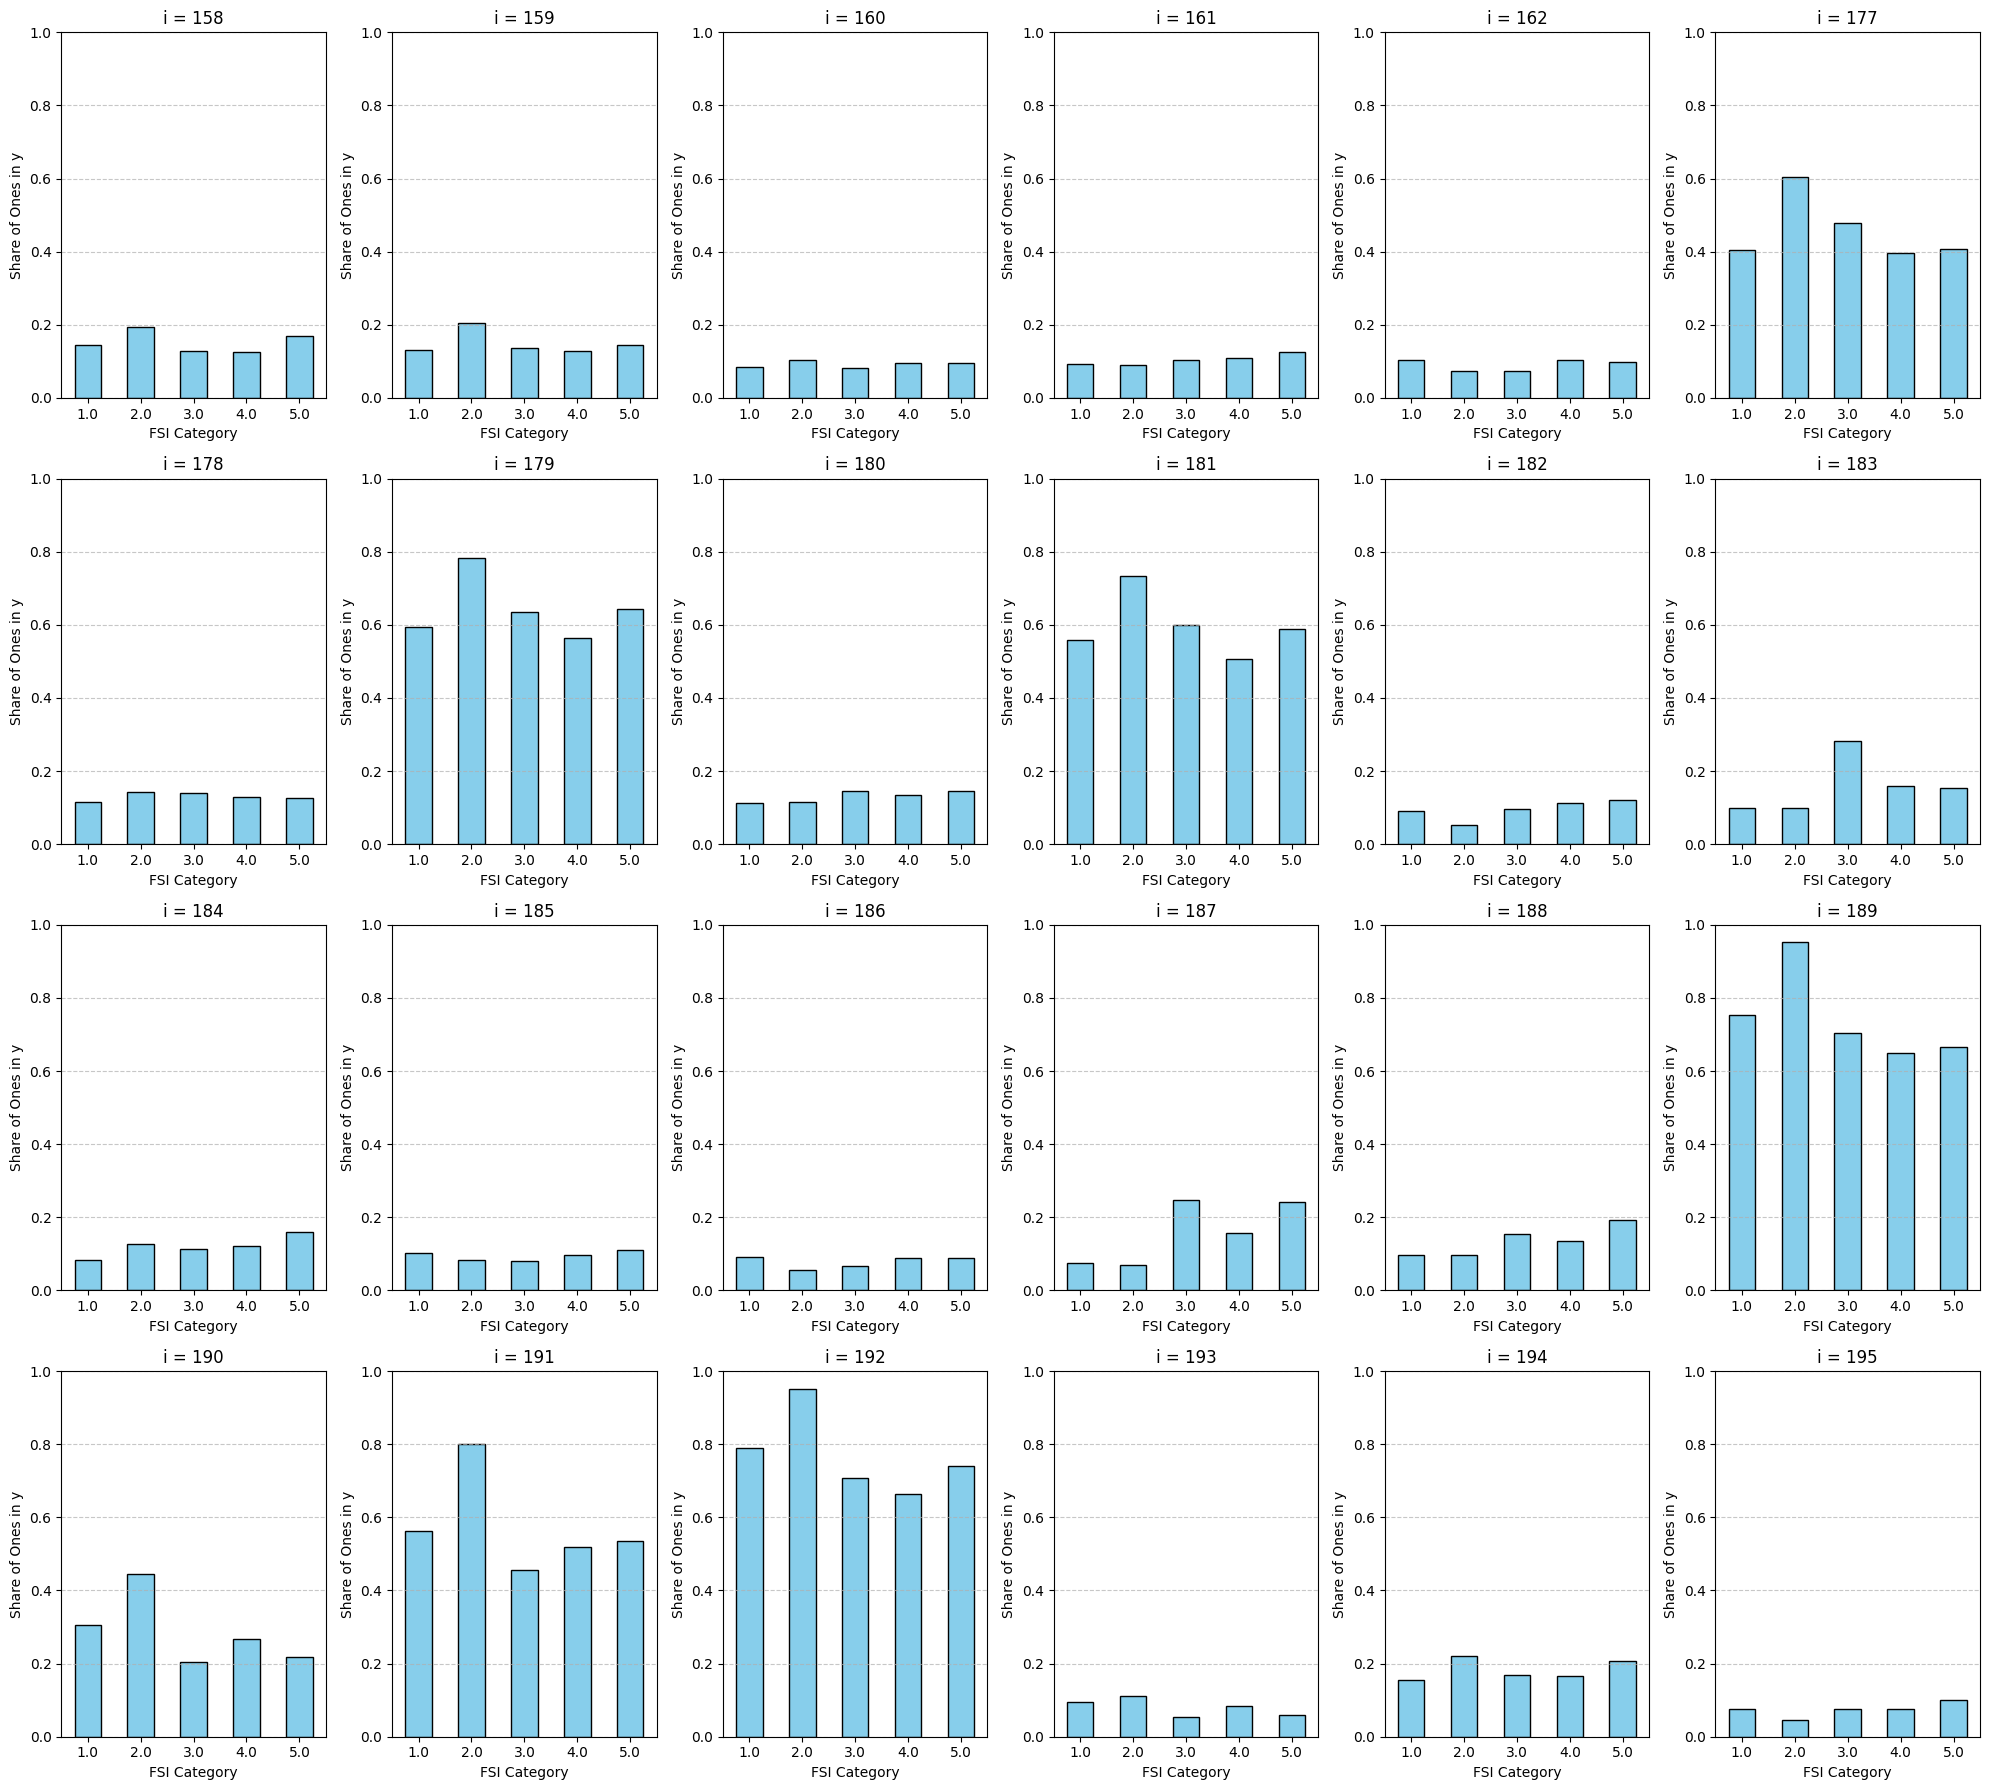

In [41]:
import matplotlib.pyplot as plt

def plot_accuracy(i, df1, ax=None):
    name_gpt = f'Q{i}_gpt'
    name_y = f'Q{i}_y'
    df1 = df1.copy()
    df1[name_y] = (df1[f'Q{i}'] == df1[name_gpt])
    share_ones = df1.groupby('fsi')[name_y].mean()
    share_ones = share_ones.sort_index()

    # Use the provided axis if present
    if ax is None:
        ax = plt.gca()
    share_ones.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    ax.set_xlabel('FSI Category')
    ax.set_ylabel('Share of Ones in y')
    ax.set_title(f'i = {i}')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1.0)
    ax.set_xticklabels(share_ones.index, rotation=0)

# 24 elements, 6 rows, 4 columns
fig, axes = plt.subplots(4, 6, figsize=(20, 18))
axes = axes.flatten()

for idx, i in enumerate(arr):
    plot_accuracy(int(i), df1, ax=axes[idx])

# Turn off any unused subplots (if arr < 24)
for j in range(len(arr), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Q177, Q179, Q181, Q181, Q191, Q192 - вопросы, для которых строим логит-регрессию

## Логит регрессия по fsi для Q177